## LetsGrowMore

### Name: Sonia Tripathi
### LGM_Task2

### IRIS FLOWER DATASET

### Problem statement
The aim of this project is to classify flowers among setosa, versicolor, or virginica species on basis of length of sepals and petals and width of sepals and petals using Decision Tree Classifier.
 

### Data Definition
6 Attributes present in the dataset are:


 **1. Id** - id
 
 **2. SepalLengthCm** - Length of the sepal in cm
 
 **3. SepalWidthCm** - Width of the sepal in cm
 
 **4. PetalLengthCm** - Length of the petal in cm
 
 **5. PetalWidthCm** - Width of the petal in cm
 
 **6. Species** - Species name

### IMPORT STATEMENTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [2]:
plt.rcParams['figure.figsize']=[15,8]

### Read Data

In [3]:
df=pd.read_csv("Iris.csv")

In [4]:
print('First 5 observation of iris dataset:')
df.head()

First 5 observation of iris dataset:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
print('Last 5 observation of iris dataset:')
df.tail()

Last 5 observation of iris dataset:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### Data Dimension

In [6]:
df.shape

(150, 6)

- The dataset has 6 columns and 150 observation.

### Data Types

In [7]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

- The data types are as per the data definition.
- Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm - Numerical Variables.
- Species - Categorical Variable

### Removing Insignificant Columns

In [8]:
df= df.drop(['Id'], axis = 1)

### 5 Point summary

In [9]:
df.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


- from the above output, we can infer that :
    - there are no missing values since the count values for each of column is 150.
    - 5 point summary(min,25%,50%,75%,max), mean and Standard devation for different numerical variables can be seen.
    - For the Target[Species] variable there are 3 unique values present.

### Missing Values

In [10]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

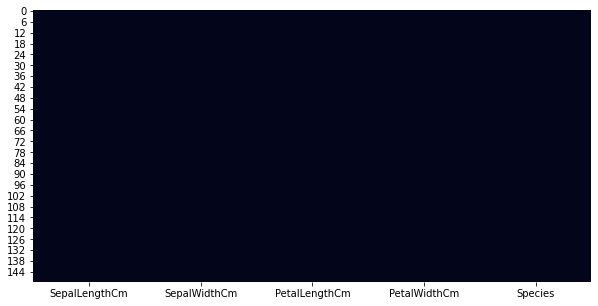

In [11]:
plt.figure(figsize=(10,5))
# plot heatmap to check null values 
sns.heatmap(df.isnull(), cbar=False)
plt.show()

- Missing values not present in the dataset

In [12]:
df_numeric_features = df.select_dtypes(include=np.number)
df_numeric_features.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

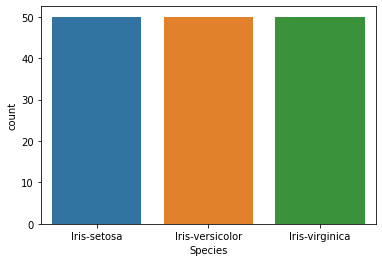

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(df['Species'])
plt.show()

- All the 3 species has same number of observation.
- The target variable is balanced

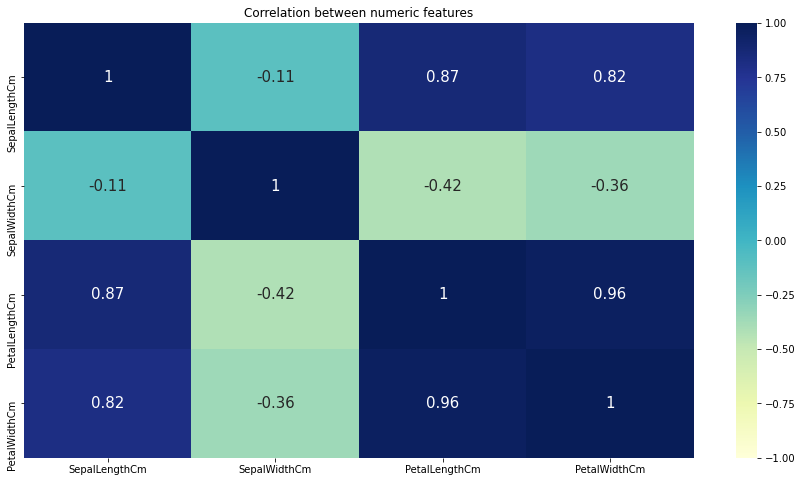

In [14]:
sns.heatmap(df_numeric_features.corr(), cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15} )
plt.title('Correlation between numeric features')
# display the plot
plt.show()

- The above heatmap, show that their is strong positive correlation between:
    - SepalLengthCm and PetalLengthCm with 0.87.
    - SepalLengthCm and PetalWidthCm with 0.82.
    - PetalLengthCm and PetalWidthCm with 0.96.

In [15]:
# Creating a copy of main dataset
df_copy=df.copy()

In [16]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
X = df.drop(["Species"], axis = 1)
y = df["Species"]

In [18]:
X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [19]:
y.head(2)

0    Iris-setosa
1    Iris-setosa
Name: Species, dtype: object

In [20]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [21]:
X_train.shape

(120, 4)

In [22]:
X_test.shape

(30, 4)

### Decision Tree classification

In [23]:
decision_tree_classification = DecisionTreeClassifier()
# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train, y_train)

In [24]:
print("DecisionTree Model Score is : ",decision_tree.score(X_test,y_test))

DecisionTree Model Score is :  0.9333333333333333


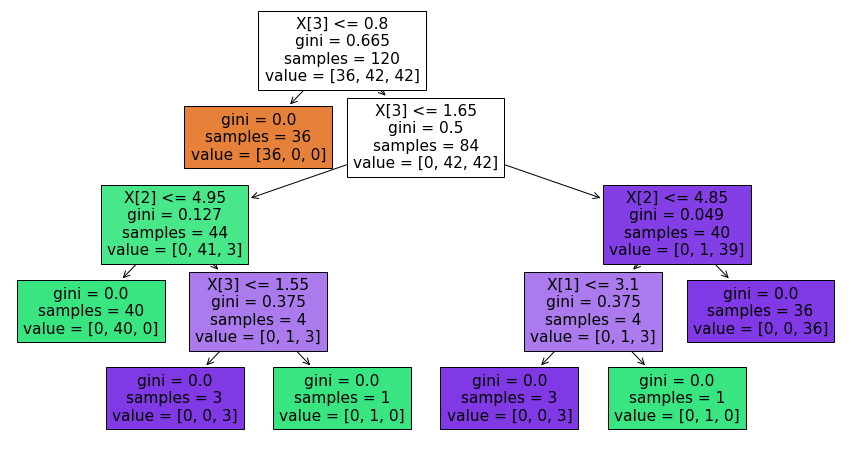

In [25]:
tree.plot_tree(decision_tree,filled=True)
plt.show()

### Decision Tree classification Tuned Model

In [26]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']}

In [27]:
grid_search = GridSearchCV(estimator=decision_tree_classification,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [28]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [29]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 9, 'splitter': 'random'}


In [30]:
grid_search.best_score_

0.9916666666666668

In [31]:
decision_tree_tuned = DecisionTreeClassifier(criterion = 'entropy', max_depth =5,min_samples_leaf= 4, min_samples_split= 9,  splitter ='random')
decision_tree_tuned.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=9, splitter='random')

In [32]:
# dt.score(X_test,y_test)
print("DecisionTree Model Score is : ",decision_tree_tuned.score(X_test,y_test))

DecisionTree Model Score is :  0.9666666666666667


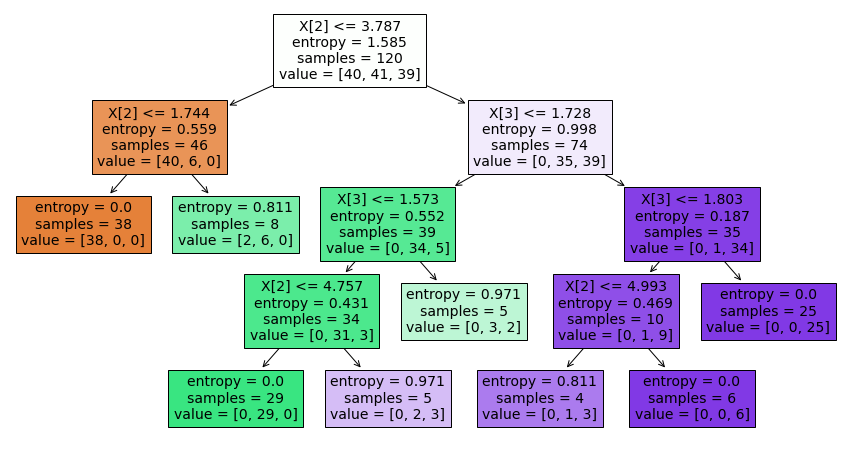

In [33]:
tree.plot_tree(decision_tree_tuned,filled=True)
plt.show()

- Decision Tree with best parameters has accuracy of 0.96

### Prediction

In [35]:
data1 = [[4.6,3.1,1.5,0.2]]
pred = decision_tree_tuned.predict(data1)
pred

array(['Iris-setosa'], dtype=object)

In [36]:
data2 = [[6.4,3.2,4.5,1.5]]
pred = decision_tree_tuned.predict(data2)
pred

array(['Iris-versicolor'], dtype=object)

In [37]:
data3 = [[6.3,2.5,5.0,1.9]]
pred = decision_tree_tuned.predict(data3)
pred

array(['Iris-virginica'], dtype=object)